<div>
    <h2 class="text-center">
        &nbsp;
        <span class="">Using k-means algorithm</span>
    </h2>
</div>

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Run cell
</span>

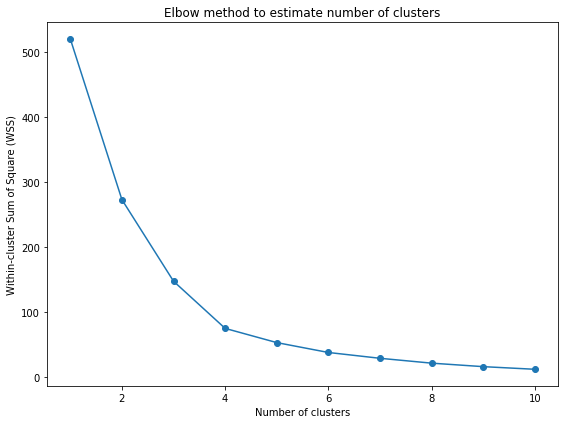

In [1]:
"""
Definition of data set taken to run following example. 
Application of Elbow method to estimate the numer of recommended centroids.
"""

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans # you use sklearn to compute the "elbow" - optimal number of clusters 


# data set
X = np.array([[0.3,8.3 ], [3, 8], [2, 9],[0.3, 8.9],[1.7, 9.7 ],
              [0.9, 10.5], [10.3, 2.1],[10, 2],[7, 7 ], [6.9, 6.5],
              [6, 6],[1, 2], [1.5, 1.8], [5, 8 ], [8, 8], [1, 0.6],
              [9,11],[12, 5], [4.5, 4.8], [4.5, 3 ], [2, 8], [9, 3], [9,7]])

# now you run the estimation of clusters (Elbow method) you shoud apply for our algorithm
#you plot the the analysis

distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Square (WSS)')
plt.title('Elbow method to estimate number of clusters')
plt.tight_layout()

plt.show()

The above curve is the output of applying the elbow method in order to determine the optimal number of clusters to be applied for a given data set.

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Run cell
</span>

In [3]:
import numpy as np
import random

class Kmeans_dev:
    """
    class definition
    """
    
    def __init__(self,X,K):
        """
        class constructor
        """
        self.X = X
        self.output = {}
        self.centroids = np.array([]).reshape(self.X.shape[1],0)
        self.K = K
        self.m = self.X.shape[0]
        
    
    def start_centroid_pos(self, X, K):
        """
        Random initialization of K centroids.
        """
        m,n = X.shape[0], X.shape[1]
        centroids = np.zeros((K,n))

        for i in range(K):
        #for i in range(1,K+1,1):
            centroids[i] = X[np.random.randint(0,m),:]

        return centroids
    

    def fit(self,n_iter):
        """
        Method to train the data set (position of centroids()
        """
        #randomly Initialize the centroids (callstart_centroid_pos() )
        self.centroids=self.start_centroid_pos(self.X,self.K)
        
        #compute Euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            
            #adjust the centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1] = Y[k+1].T
            for k in range(self.K):
                self.centroids[:,k] = np.mean(Y[k+1],axis = 0)
                
            self.output=Y
            
    
    def predict(self):
        """
        Return of data set adherence to certain cluster
        """
        
        return self.output,self.centroids.T
    

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Run cell
</span>

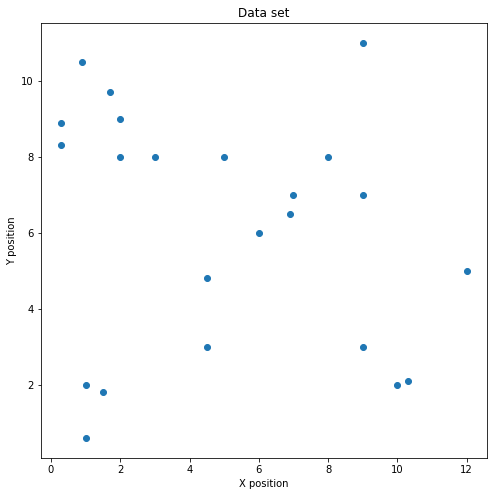

In [4]:
"""
Plot the data set
"""

plt.figure(figsize=(8, 8))

plt.scatter(X[:,0],X[:,1])
plt.title('Data set')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()


<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Run cell
</span>

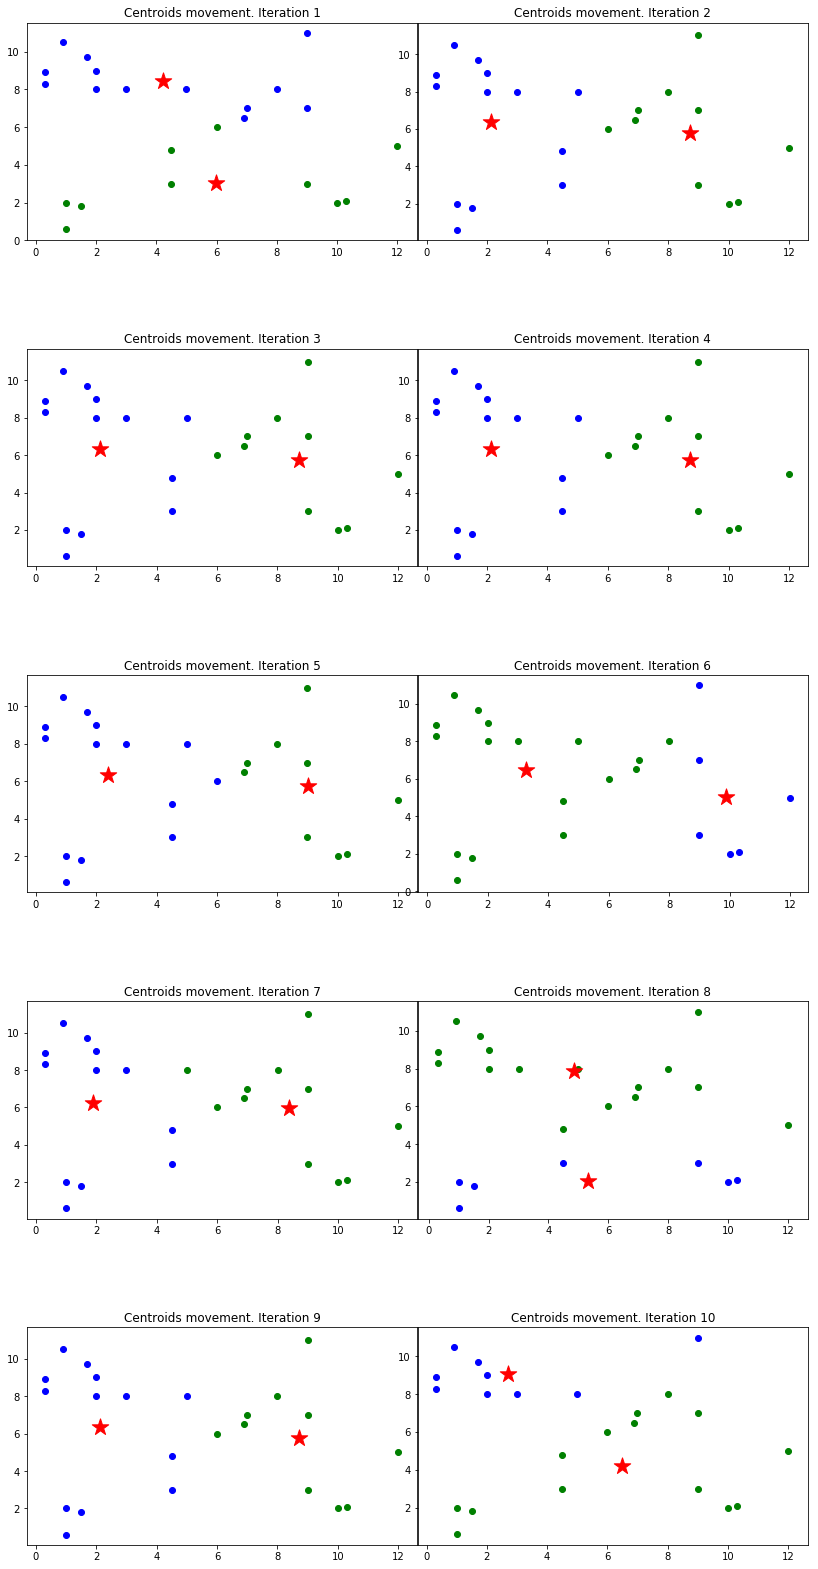

In [5]:
"""
Run k-means algorithm on given data set. Printing the output (position of centrod) and adherence of point to
certain cluster
"""


K= 2 # number of cluster you would like to create

#creation of class object and training (fit)
kmeans=Kmeans_dev(X,K)
kmeans.fit(50)

color=['blue','green']
labels=['cluster1','cluster2']

fig, axs = plt.subplots(5,2, figsize=(14, 28), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

#you print the test results iteration by iteration (in order to show how the centroids moves)

for i in range(10):
    kmeans=Kmeans_dev(X,K)

    kmeans.fit(1)

    Output,Centroids=kmeans.predict()
    
    for k in range(K):
        axs[i].scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
    axs[i].scatter(Centroids[:,0],Centroids[:,1],s=300,c='red',label='Centroids', marker='*')
    
    axs[i].set_title("Centroids movement. Iteration "+ str(1+i))

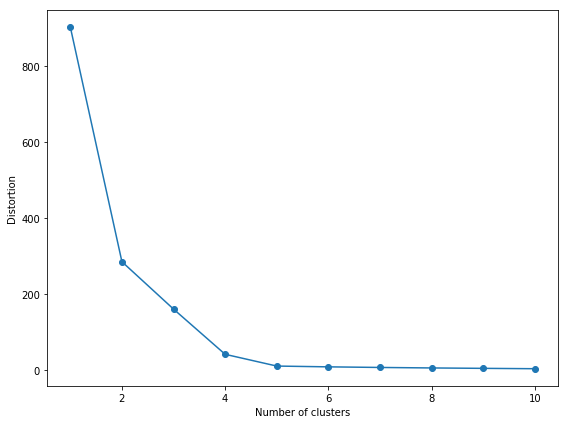

In [12]:
"""
Now you run the estimation of clusters (Elbow method) you should apply for our algorithm
You plot the the analysis  
"""
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

In [13]:
"""
Now you learn the model based on your own data set
"""

from sklearn.cluster import KMeans

# definition of object and setup
km = KMeans(n_clusters=5, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
# we learn our model (object) with provided data set
y_km = km.fit_predict(X)

('Position of centroid (obstacle). X ::', -0.7077549523809524, 'Y ::', 4.103421666666666)
('Position of centroid (obstacle). X ::', -0.28040981249999997, 'Y ::', -1.6504889166666659)
('Position of centroid (obstacle). X ::', 1.9656342857142857, 'Y ::', 0.11265271428571422)
('Position of centroid (obstacle). X ::', -2.0106507777777782, 'Y ::', 1.0564223055555555)
('Position of centroid (obstacle). X ::', -1.7930721923076924, 'Y ::', 2.884551846153846)


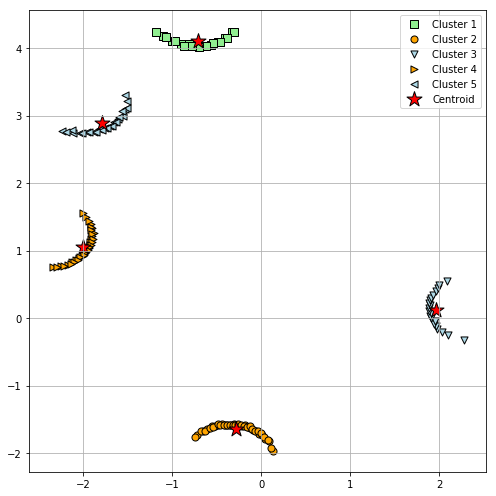

In [14]:
"""
Now you plot our results - cluseters and centroids
"""
plt.figure(figsize=(7, 7))
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen',marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange',marker='o', edgecolor='black',label='Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='orange',marker='>', edgecolor='black',label='Cluster 4')
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s=50, c='lightblue', marker='<', edgecolor='black', label='Cluster 5')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black',label='Centroid')


for i in range(len(km.cluster_centers_)):
    print ("Position of centroid (obstacle). X ::", km.cluster_centers_ [i,0], "Y ::", km.cluster_centers_[i,1])

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()